In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [46]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,54,1,0,140,239,0,1,160,0,1.20,2,0,2,1
3,48,0,2,130,275,0,1,139,0,0.20,2,0,2,1
4,49,1,1,130,266,0,1,171,0,0.60,2,0,2,1


## Data Analysis

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  output    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.4 KB


In [48]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,277.00,277.00,277.00,277.00,277.00,277.00,277.00,277.00,277.00,277.00,277.00,277.00,277.00,277.00
mean,54.45,0.68,0.96,131.38,246.32,0.15,0.53,149.42,0.34,1.03,1.40,0.77,2.31,0.53
std,9.02,0.47,1.04,17.25,52.33,0.36,0.52,23.12,0.47,1.17,0.61,1.04,0.62,0.50
min,34.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,154.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.00,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,195.00,1.00,6.20,2.00,4.00,3.00,1.00


In [49]:
data.output.value_counts()

1    148
0    129
Name: output, dtype: int64

In [50]:
data.output.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (output)

In [51]:
# Checking for messing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
output      0
dtype: int64

In [52]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [53]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'output']

Heart Disease by Gender

In [54]:
have_disease = data.loc[data['output']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['output']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

Heart Disease by Chest Pain Type

In [55]:
have_disease = data.loc[data['output']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['output']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

Heart Disease by Fasting Blood Sugar

In [56]:
have_disease = data.loc[data['output']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['output']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Fasting Blood Sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fbs.I  :Bars   [index]   (fbs)
   .Bars.Fbs.II :Bars   [index]   (fbs)

Heart Disease by ECG Results

In [57]:
have_disease = data.loc[data['output']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['output']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Restecg.I  :Bars   [index]   (restecg)
   .Bars.Restecg.II :Bars   [index]   (restecg)

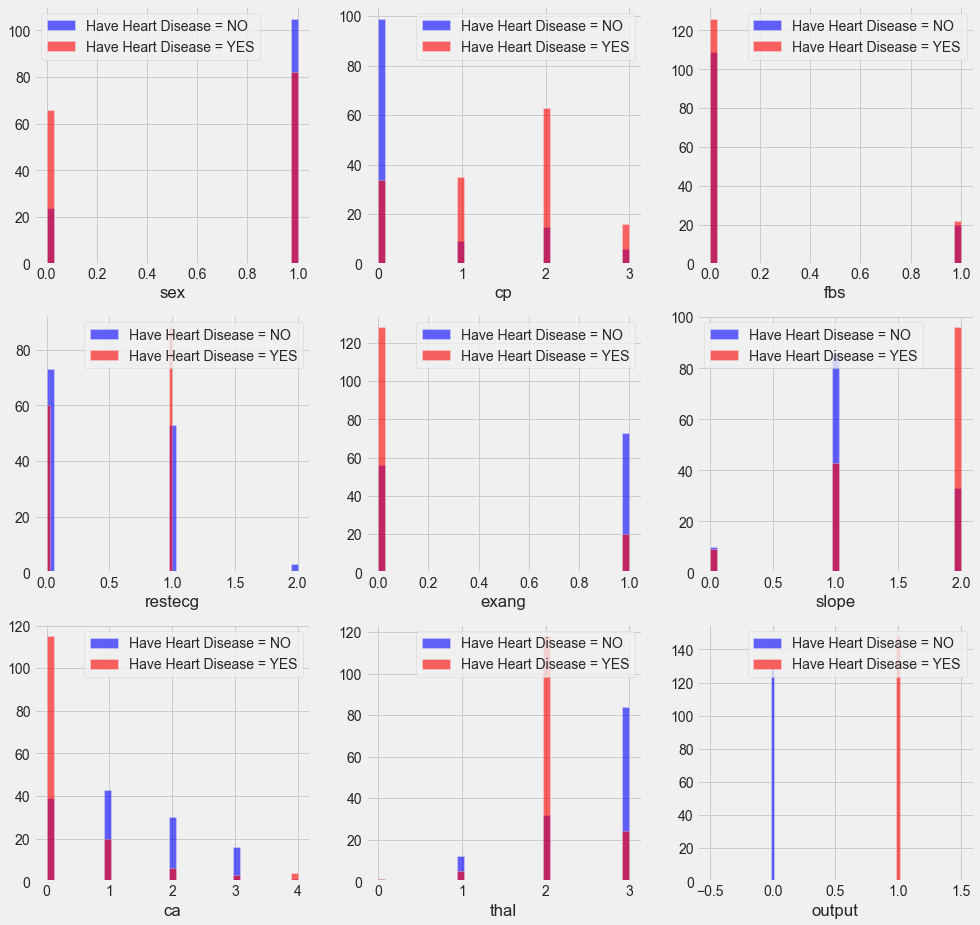

In [58]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["output"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["output"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

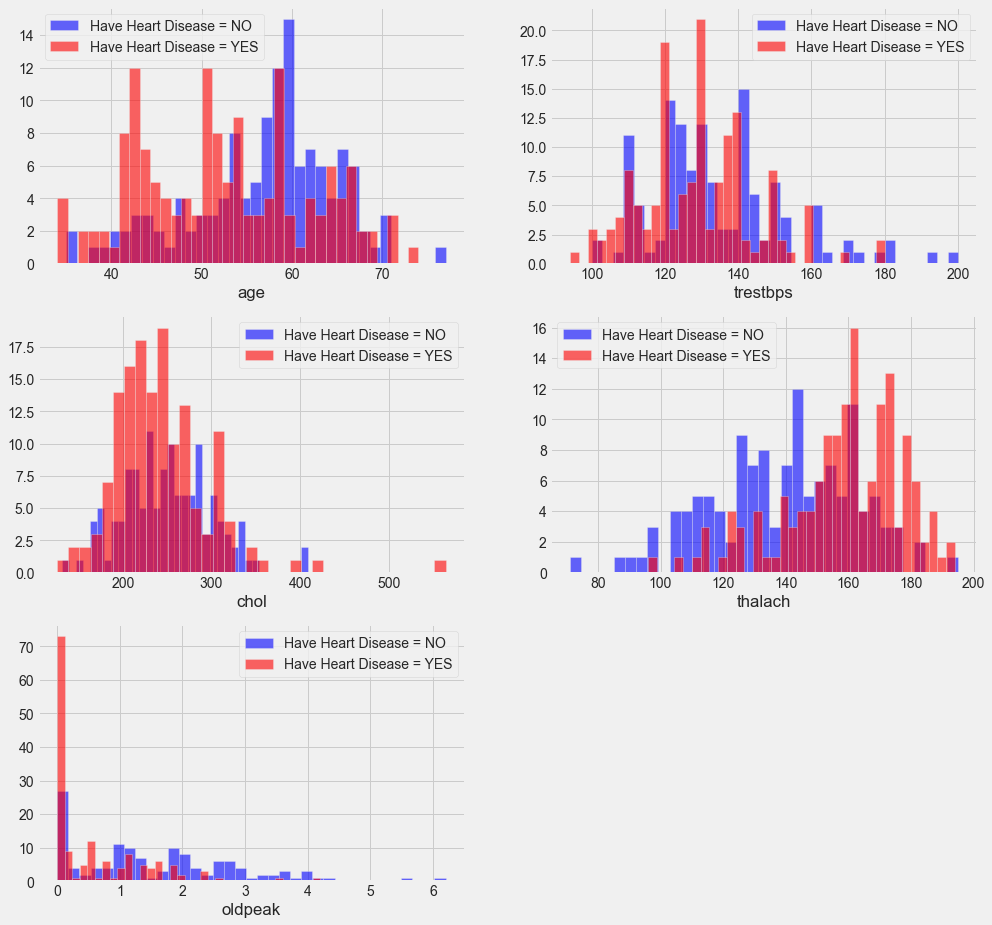

In [59]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["output"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["output"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Age vs. Max Heart Rate for Heart Disease

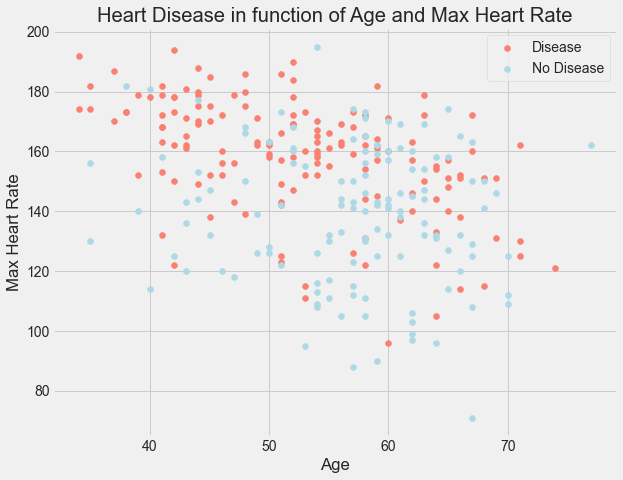

In [60]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age[data.output==1],
            data.thalach[data.output==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.output==0],
            data.thalach[data.output==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Correlation Matrix

(14.5, -0.5)

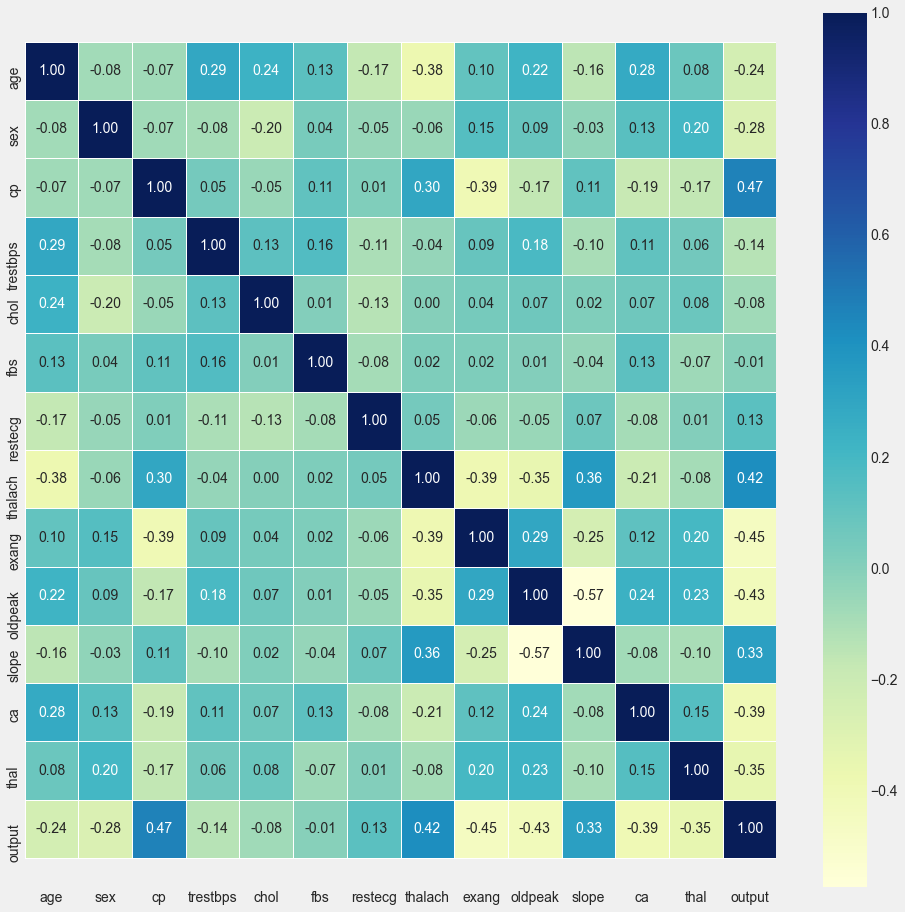

In [61]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [62]:
data.drop('output', axis=1).corrwith(data.output).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

## Data Processing

In [63]:
categorical_val.remove('output')
#del data['output']

In [64]:
#cat_val

In [65]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'output'],
      dtype='object')


In [66]:
#from sklearn.preprocessing import StandardScaler

#s_sc = StandardScaler()
#col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [67]:
#dataset.head()

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [69]:
from sklearn.model_selection import train_test_split

X = data.drop('output', axis=1)
y = data.output

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine Learning Model Training

1. Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   96.00 111.00      1.00     207.00        207.00
_______________________________________________
Confusion Matrix: 
 [[ 96   0]
 [  0 111]]

Test Result:
Accuracy Score: 78.57%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.80  0.78      0.79       0.79          0.79
recall     0.73  0.84      0.79       0.78          0.79
f1-score   0.76  0.81      0.79       0.78          0.78
support   33.00 37.00      0.79      70.00         70.00
_______________________________________________
Confusion Matrix: 
 [[24  9]
 [ 6 31]]



In [71]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.00,78.57


2. Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   96.00 111.00      1.00     207.00        207.00
_______________________________________________
Confusion Matrix: 
 [[ 96   0]
 [  0 111]]

Test Result:
Accuracy Score: 84.29%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.89  0.81      0.84       0.85          0.85
recall     0.76  0.92      0.84       0.84          0.84
f1-score   0.82  0.86      0.84       0.84          0.84
support   33.00 37.00      0.84      70.00         70.00
_______________________________________________
Confusion Matrix: 
 [[25  8]
 [ 3 34]]



In [73]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.00,78.57
1,Random Forest Classifier,100.00,84.29


## Models Hyperparameter Tuning

1. Decision Tree Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 83.09%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.79   0.87      0.83       0.83          0.83
recall     0.86   0.80      0.83       0.83          0.83
f1-score   0.83   0.84      0.83       0.83          0.83
support   96.00 111.00      0.83     207.00        207.00
_______________________________________________
Confusion Matrix: 
 [[83 13]
 [22 89]]

Test Result:
Accuracy Score: 81.43%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.81  0.82      0.81       0.81          0.81
recall     0.79  0.84      0.81       0.81          0.81
f1-score   0.80  0.83      0.81       0.81        

In [75]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100
train_score_tree = train_score
test_score_tree = test_score

tuning_results_df = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score_tree, test_score_tree]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Decision Tree Classifier,83.09,81.43


2. Random Forest Hyperparameter Tuning

In [76]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Accuracy Score: 90.82%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.94   0.88      0.91       0.91          0.91
recall     0.85   0.95      0.91       0.90          0.91
f1-score   0.90   0.92      0.91       0.91          0.91
support   96.00 111.00      0.91     207.00        207.00
_______________________________________________
Confusion Matrix: 
 [[ 82  14]
 [  5 106]]

Test Result:
Accuracy Score: 84.29%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.92  0.80      0.84       0.86          0.86
recall     0.73  0.95      0.84       0.84          0.84
f1-score   0.81  0.86      0.84       0.84

In [77]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100
test_score_rf = test_score
train_score_rf = train_score

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score_rf, test_score_rf]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Decision Tree Classifier,83.09,81.43
1,Tuned Random Forest Classifier,90.82,84.29


In [78]:
data_prediction = pd.read_csv("test_data.csv")

In [79]:
from csv import reader
import codecs
with codecs.open('test_data.csv') as read_heart:
    csv_reader = reader(read_heart)
    row_number = 4
    list_of_rows = list(csv_reader)
    value = list_of_rows[row_number - 1]
    #value.pop(0)
    
    float_list = value[9:10]
    int_list = value[0:9]
    int_list_2 = value[10:13]

    f = [float(i) for i in float_list]
    i = [int(i) for i in int_list]
    i_2 = [int(i) for i in int_list_2]
    c = i + f + i_2
    
    print(c)

[41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2]


In [80]:
input_data = c
input_data_array = np.asarray(input_data)
input_data_reshape = input_data_array.reshape(1,-1)
prediction_rf = rf_clf.predict(input_data_reshape)
prediction_tree = tree_clf.predict(input_data_reshape)
outcome_df = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score_tree, test_score_tree, prediction_tree]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Outcome'])
outcome_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score_rf, test_score_rf, prediction_rf]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Outcome'])
outcome_df = outcome_df.append(outcome_df_2, ignore_index=True)
outcome_df

,Model,Training Accuracy %,Testing Accuracy %,Outcome
0,Tuned Decision Tree Classifier,83.09,81.43,[1]
1,Tuned Random Forest Classifier,90.82,84.29,[1]


## Joblib Exporting

In [81]:
# import joblib
# joblib.dump(tree_clf, "./model/tree_heart.joblib")
# joblib.dump(rf_clf, "./model/rf_heart.joblib")

In [82]:
# model_tree = joblib.load("./model/tree_heart.joblib")
# print(model_tree.predict(input_data_reshape))

In [83]:
# model_rf = joblib.load("./model/rf_heart.joblib")
# print(model_rf.predict(input_data_reshape))

## Probability Prediction

In [84]:
proba_tree = tree_clf.predict_proba(np.array(input_data_reshape))
proba_tree = "%.2f" % (proba_tree[0][1] * 100)
proba_result_tree =  "Probability of Heart Disease - " + str(proba_tree) + "%"
print(proba_result_tree)

Probability of Heart Disease - 100.00%


In [85]:
proba_rf = rf_clf.predict_proba(np.array(input_data_reshape))
proba_rf = "%.2f" % (proba_rf[0][1] * 100)
proba_result_rf = "Probability of Heart Disease - " + str(proba_rf) + "%"
print(proba_result_rf)

Probability of Heart Disease - 91.52%


## Anvil Connection

In [86]:
import anvil.server

anvil.server.connect("server_JAYLNQTDETB2NC6SSGBLHBME-L2G3IIM2SKJUWR4P")

In [87]:
#@anvil.server.callable
#def classify_data(info):
  #  value = info.split(',')
    
 #   float_list = value[9:10]
 #   int_list = value[0:9]
 #   int_list_2 = value[10:13]

 #   f = [float(i) for i in float_list]
 #   i = [int(i) for i in int_list]
 #   i_2 = [int(i) for i in int_list_2]
#    c = i + f + i_2
#    print(c)
#    input_data = c
#    input_data_array = np.asarray(input_data)
#    input_data_reshape = input_data_array.reshape(1,-1)
 #   prediction_rf = rf_clf.predict(input_data_reshape)
 #   prediction_tree = tree_clf.predict(input_data_reshape)
 #   proba_tree = tree_clf.predict_proba(np.array(input_data_reshape))
 #   proba_tree = "%.2f" % (proba_tree[0][1] * 100)
 #   proba_rf = rf_clf.predict_proba(np.array(input_data_reshape))
 #   proba_rf = "%.2f" % (proba_rf[0][1] * 100)
    #print(prediction_tree)
    #print(prediction_rf)
#    s = str(prediction_rf) + ',' + str(prediction_tree) + ',' + str(proba_rf) + ',' + str(proba_tree)
#    return s

In [88]:
model_tree = joblib.load("./model/tree_heart.joblib")
model_rf = joblib.load("./model/rf_heart.joblib")

NameError: name 'joblib' is not defined

In [ ]:
@anvil.server.callable
def classify_data(info):
    input_data = c
    input_data_array = np.asarray(input_data)
    input_data_reshape = input_data_array.reshape(1,-1)
    prediction_rf = model_rf.predict(input_data_reshape)
    prediction_tree = model_tree.predict(input_data_reshape)
    proba_tree = model_tree.predict_proba(np.array(input_data_reshape))
    proba_tree = "%.2f" % (proba_tree[0][1] * 100)
    proba_rf = model_rf.predict_proba(np.array(input_data_reshape))
    proba_rf = "%.2f" % (proba_rf[0][1] * 100)
    print(prediction_tree)
    print(prediction_rf)
    s = str(prediction_rf) + ',' + str(prediction_tree) + ',' + str(proba_rf) + ',' + str(proba_tree)
    return s
#    return str(prediction_rf)